In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

import pySPEC as ps
from pySPEC.time_marching import SWHD_1D

param_path = 'examples/time_marching_swhd1D_DoubleGauss'
# Parse JSON into an object with attributes corresponding to dict keys.
pm = json.load(open(f'{param_path}/params.json', 'r'), object_hook=lambda d: SimpleNamespace(**d))
pm.Lx = 2*np.pi*pm.Lx

# Initialize solver
grid   = ps.Grid1D(pm)

In [20]:


def noise(kmin , kmax, Amin, Amax  ):
    ks = np.random.uniform(kmin,kmax, kmax-kmin)
    As = np.random.uniform(Amin, Amax, len(ks))
    phis = np.random.uniform(0,np.pi, len(ks))
    noise = 0
    for k,A,phi in zip(ks,As,phis):
        mode = A*np.sin(grid.xx*k + phi)
        noise = noise + mode
    noise[0] = 0
    noise = noise/len(ks)
    return noise

In [21]:
# structures of l ~ 400m to 1000m, scaled: 0.02 to 0.05  --> k ~ 100 to 40
noisek100 = noise(kmin = 40 , kmax = 100, Amin = 0.005, Amax= 0.05  )

# structures of l ~ 80m to 100m, scaled: 0.004 to 0.005  --> k ~ 500 to 400
noisek500 = noise(kmin = 400 , kmax = 500, Amin = 0.001, Amax= 0.005  )

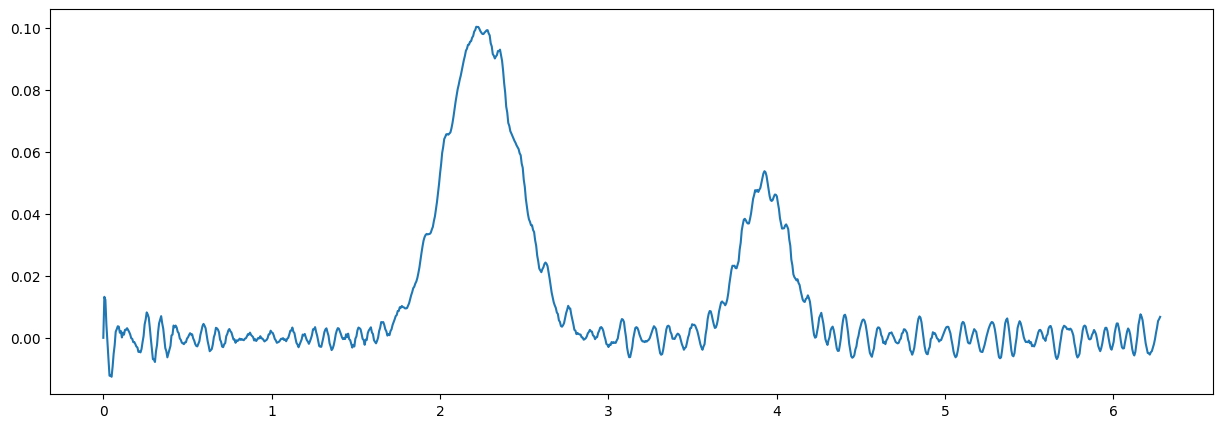

In [22]:
s0 =  0.1
s1 =  0.3
s2 = 1.4
s3 = 0.05
s4 = 0.2
s5 = 0.8
hb = s0*np.exp(-(grid.xx-np.pi/s2)**2/s1**2) + s3*np.exp(-(grid.xx-np.pi/s5)**2/s4**2) + noisek100+ noisek500

plt.figure( figsize = (15,5))
plt.plot(grid.xx , hb)


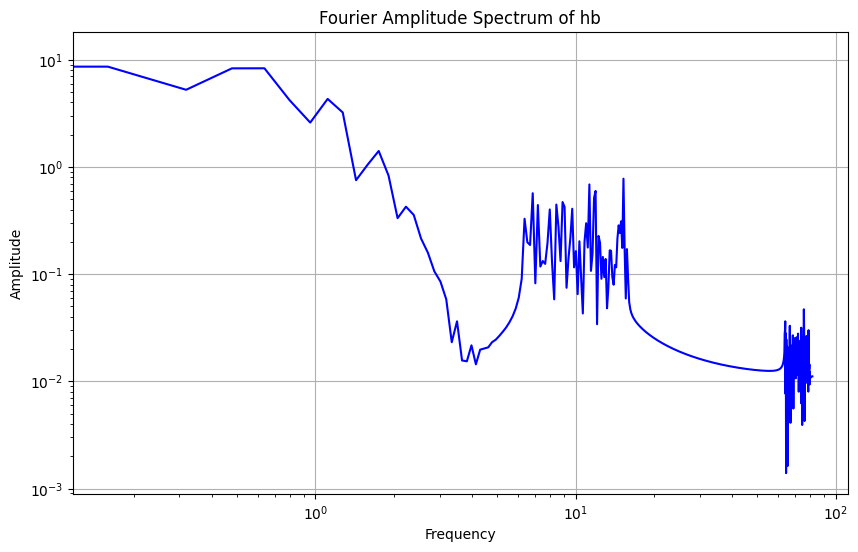

In [23]:
Nx = pm.Nx
dx = grid.dx
# Compute Fourier Transform of hb
hb_fft = np.fft.fft(hb)
hb_freq = np.fft.fftfreq(Nx, d=dx)

# Take only the positive frequencies for plotting
hb_amplitude = np.abs(hb_fft[:Nx // 2])
hb_freq_positive = hb_freq[:Nx // 2]

# Plot the Fourier Amplitude Spectrum
plt.figure(figsize=(10, 6))
plt.loglog(hb_freq_positive, hb_amplitude, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Amplitude Spectrum of hb')
plt.grid()
plt.show()